<a href="https://colab.research.google.com/github/data-science-and-machine-learning/personalized-cancer-diagnosis/blob/master/PersonalizedCancerDiagnosis_FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="font-size:36px;text-align:center"> <b>Personalized cancer diagnosis Feature engineering</b> </p>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp drive/My\ Drive/Colab\ Notebooks/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!unzip drive/My\ Drive/msk-redefining-cancer-treatment.zip -d drive/My\ Drive/msk-redefining-cancer-treatment



cp: cannot create regular file '/root/.kaggle/': Not a directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Archive:  drive/My Drive/msk-redefining-cancer-treatment.zip
replace drive/My Drive/msk-redefining-cancer-treatment/test_text.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [0]:
data = pd.read_csv('drive/My Drive/msk-redefining-cancer-treatment/training_variants')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [0]:
# note the seprator in this file
data_text =pd.read_csv("drive/My Drive/msk-redefining-cancer-treatment/training_text",sep="\|\|",engine="python",
                       names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [0]:
#merging both gene_variations and text data based on ID
result = pd.merge(data, data_text,on='ID', how='left')
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


<h3>3.1.3. Preprocessing of text</h3>

In [0]:
# loading stop words from nltk library
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(stop_words)


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
            else:
                pass
        
        data_text[column][index] = string
        
        
#text processing stage.
start_time = time.clock()
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'each', 'him', "didn't", 'having', 'wasn', 'both', 'needn', 'during', 'about', 'more', 'a', 'hers', "shouldn't", 'with', 'as', 'can', 'mightn', 'these', 'am', 'ours', 'his', 'doesn', "should've", 'but', 'while', 'that', 'doing', 'her', 'they', 'how', 'aren', 'wouldn', 'too', 'do', 'will', "shan't", 'who', 'below', "hasn't", 'its', 'from', 'into', 'just', 'ma', 'd', 'weren', 've', 'haven', 'over', 'has', "wasn't", 'didn', 'yourselves', "mightn't", 'himself', 'itself', 'don', 'their', 'hadn', 'nor', 'between', 'myself', 'same', 'have', 're', "won't", 'been', 'some', 'than', 'won', 'shan', "you'd", 'hasn', 'above', 'here', 'an', 'them', "couldn't", "you'll", 'at', 's', 'through', 'my', 'before', "needn't", 'are', 'ourselves', 'out', 'there', 'then', 'down', 'we', "weren't", 'our', 'is', 'couldn', 'on', 't', "hadn't", 'being', 'where', 'after', 'until', 'now', 'isn', 'shouldn', '

In [0]:

result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']
result.head(1)

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...


In [0]:
result[result['ID']==1109]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,FANCA S1088F


<h3>3.1.4. Test, Train and Cross Validation Split</h3>

<h4>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h4>

In [0]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, shuffle= True, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, shuffle= True, test_size=0.2)

![alt text](https://)<h3> Using only Text Feature</h3>

In [0]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
from sklearn.feature_extraction.text import TfidfVectorizer
# modifying BoW into tfidf with max features/words= 1000
text_vectorizer = TfidfVectorizer(ngram_range= (1,5), min_df=3)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))
text_fea_arr = np.array(zip(list(train_text_features),train_text_fea_counts))

test_text_feature_onehotCoding= text_vectorizer.transform(test_df['TEXT'])
cv_text_feature_onehotCoding= text_vectorizer.transform(cv_df['TEXT'])
print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 5124740


In [0]:
# important features
print(np.shape(cv_text_feature_onehotCoding))
text_fea_arr = np.array((list(train_text_features),train_text_fea_counts))
arr= np.transpose(text_fea_arr)
arr.sort(axis=0)
print(arr[::-1])


[['ﬁxed and' '93.25428162436303']
 ['ﬁxed' '91.18569956343917']
 ['ϵ280 6800 cm corresponding to' '9.988954066065716']
 ...
 ['00 0005' '0.0023958018531326742']
 ['00 00' '0.0023684357164754045']
 ['00' '0.0023684357164754045']]


In [0]:
test_text_feature_onehotCoding.shape

(665, 5124740)

In [0]:
print('*'*100, '\n Trying chi2 with selectkbest\n', '*'*100)
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from scipy import sparse


train_log_error_array= []
test_log_error_array= []
cv_log_error_array= []

alp = [10 ** x for x in range(-6, -2)]
k_range = [2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 12000, 14000, 16000, 18000, 20000, 24000]
for j in k_range:
  
  train= train_text_feature_onehotCoding
  test= test_text_feature_onehotCoding
  cv= cv_text_feature_onehotCoding

  bestfit = (SelectKBest(chi2, k=j).fit(train, y_train))
  best_train= bestfit.transform(train)
  best_cv = bestfit.transform(cv)
  best_test = bestfit.transform(test)
  
  
  '''  best_train = normalize(SelectKBest(chi2, k=j).fit_transform(train, y_train), axis= 0)
  best_cv = normalize(SelectKBest(chi2, k=j).transform(cv, y_cv), axis= 0)
  best_test = normalize(SelectKBest(chi2, k=j).transform(test, y_test), axis= 0)'''
  print('*'*100)
  print('Using ', np.shape(best_train)[1], ' best features and applying hyper parameter tuning...')
  for i in alp:

    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=0)
    clf.fit(best_train, y_train) 

    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(best_train, y_train)
    predict_y_train = sig_clf.predict_proba(best_train)
    predict_y_cv = sig_clf.predict_proba(best_cv)
    predict_y_test = sig_clf.predict_proba(best_test)
    #cv_log_error_array.append([log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15), j, i])
    print('Alpha= ',i, 'with top ',j, "features, Train loss: {:.3f}, CV loss: {:.3f}, Test loss: {:.3f}"\
          .format(log_loss(y_train, predict_y_train, labels=clf.classes_, eps=1e-15),\
                  log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15),\
                  log_loss(y_test, predict_y_test, labels=clf.classes_, eps=1e-15)))
    train_log_error_array.append(log_loss(y_train, predict_y_train, labels=clf.classes_, eps=1e-15))
    test_log_error_array.append(log_loss(y_test, predict_y_test, labels=clf.classes_, eps=1e-15))
    cv_log_error_array.append(log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15))
            


In [0]:
train= train_text_feature_onehotCoding
test= test_text_feature_onehotCoding
cv= cv_text_feature_onehotCoding

bestfit = (SelectKBest(chi2, k=4000).fit(train, y_train))

best_train= bestfit.transform(train)
best_cv = bestfit.transform(cv)
best_test = bestfit.transform(test)

best_tfidfs_train= best_train
best_tfidfs_test= best_test
best_tfidfs_cv= best_cv

In [0]:
# Applying best features on the top of logistic regression.


train= best_tfidfs_train#normalize(train_text_feature_onehotCoding, axis= 0)
test= best_tfidfs_test#normalize(test_text_feature_onehotCoding, axis= 0)
cv= best_tfidfs_cv#normalize(cv_text_feature_onehotCoding, axis= 0)


cv_log_error_array= []
alp = [10 ** x for x in range(-7, 1)]

for i in alp:

  clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
  clf.fit(train, y_train) 

  sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
  sig_clf.fit(train, y_train)
  predict_y = sig_clf.predict_proba(cv)
  cv_log_error_array.append([log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)])#, j, i])
  print('For values of alpha =', i, 'and using best', test.shape[1], "features, The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
  
print(alp[np.argmin(cv_log_error_array)])
print(np.argmin(cv_log_error_array))
  
  
  


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alp[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train, y_train)


predict_y = sig_clf.predict_proba(train)
print('For values of best alpha = ', alp[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv)
print('For values of best alpha = ', alp[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test)
print('For values of best alpha = ', alp[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For values of alpha = 1e-07 and using best 4000 features, The log loss is: 1.2431516966551253
For values of alpha = 1e-06 and using best 4000 features, The log loss is: 1.1123968329068061
For values of alpha = 1e-05 and using best 4000 features, The log loss is: 1.0750077009529182
For values of alpha = 0.0001 and using best 4000 features, The log loss is: 1.1122215593764675
For values of alpha = 0.001 and using best 4000 features, The log loss is: 1.2006564824112764
For values of alpha = 0.01 and using best 4000 features, The log loss is: 1.2702759362958145
For values of alpha = 0.1 and using best 4000 features, The log loss is: 1.3971224205539376
For values of alpha = 1 and using best 4000 features, The log loss is: 1.451837771533906
1e-05
2
For values of best alpha =  1e-05 The train log loss is: 0.8332438143499272
For values of best alpha =  1e-05 The cross validation log loss is: 1.0750077009529182
For values of best alpha =  1e-05 The test log loss is: 1.0653408661663586


In [116]:
# Linear regression and hyperparametertuning

# Applying best features on the top of logistic regression.


train= best_tfidfs_train#normalize(train_text_feature_onehotCoding, axis= 0)
test= best_tfidfs_test#normalize(test_text_feature_onehotCoding, axis= 0)
cv= best_tfidfs_cv#normalize(cv_text_feature_onehotCoding, axis= 0)


cv_log_error_array= []
alp = [10 ** x for x in range(-7, 1)]

for i in alp:

  clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
  clf.fit(train, y_train) 

  sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
  sig_clf.fit(train, y_train)
  predict_y = sig_clf.predict_proba(cv)
  cv_log_error_array.append([log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)])#, j, i])
  print('For values of alpha =', i, 'and using best', test.shape[1], "features, The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
  
print(alp[np.argmin(cv_log_error_array)])
print(np.argmin(cv_log_error_array))
  
  
  


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alp[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train, y_train)


predict_y = sig_clf.predict_proba(train)
print('For values of best alpha = ', alp[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv)
print('For values of best alpha = ', alp[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test)
print('For values of best alpha = ', alp[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For values of alpha = 1e-07 and using best 4000 features, The log loss is: 1.2691227391289923
For values of alpha = 1e-06 and using best 4000 features, The log loss is: 1.2292115794356648
For values of alpha = 1e-05 and using best 4000 features, The log loss is: 1.2091975105286878
For values of alpha = 0.0001 and using best 4000 features, The log loss is: 1.282818435928487
For values of alpha = 0.001 and using best 4000 features, The log loss is: 1.3449605422314523
For values of alpha = 0.01 and using best 4000 features, The log loss is: 1.32157697938276
For values of alpha = 0.1 and using best 4000 features, The log loss is: 1.459446192731366
For values of alpha = 1 and using best 4000 features, The log loss is: 1.460799830977104
1e-05
2
For values of best alpha =  1e-05 The train log loss is: 0.9663748231775053
For values of best alpha =  1e-05 The cross validation log loss is: 1.2091975105286878
For values of best alpha =  1e-05 The test log loss is: 1.1985157941743294


In [85]:
# Applying best features on the top of Random forest.
from sklearn.ensemble import RandomForestClassifier as RF

depth =  [10, 20, 30, 40, 50]
n_estimators= [100, 200, 400, 500, 600]


train= best_tfidfs_train#normalize(train_text_feature_onehotCoding, axis= 0)
test= best_tfidfs_test#normalize(test_text_feature_onehotCoding, axis= 0)
cv= best_tfidfs_cv#normalize(cv_text_feature_onehotCoding, axis= 0)


cv_log_error_array= []
alp = [10 ** x for x in range(-7, 1)]

for j in n_estimators:
  for i in depth:

    clf = RF(n_estimators= j, max_depth= i, class_weight='balanced', n_jobs= -1)
    clf.fit(train, y_train) 

    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train, y_train)
    predict_y = sig_clf.predict_proba(cv)
    cv_log_error_array.append([log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15), j, i])
    print('Estimators= ', j, 'depth', i, 'The CV log loss is:',log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

print(alp[np.argmin(cv_log_error_array)])
print(np.argmin(cv_log_error_array))
  
  
 

Estimators=  100 depth 10 The CV log loss is: 1.1907770300861145
Estimators=  100 depth 20 The CV log loss is: 1.0663267286880995
Estimators=  100 depth 30 The CV log loss is: 1.0305215840748765
Estimators=  100 depth 40 The CV log loss is: 1.0363951004866396
Estimators=  100 depth 50 The CV log loss is: 1.032366096133059
Estimators=  200 depth 10 The CV log loss is: 1.1714460563705216
Estimators=  200 depth 20 The CV log loss is: 1.0636401125154225
Estimators=  200 depth 30 The CV log loss is: 1.034475319995576
Estimators=  200 depth 40 The CV log loss is: 1.028300384551816
Estimators=  200 depth 50 The CV log loss is: 1.0375468596119848
Estimators=  400 depth 10 The CV log loss is: 1.1761288932332066
Estimators=  400 depth 20 The CV log loss is: 1.0607489520716147
Estimators=  400 depth 30 The CV log loss is: 1.027251419712413
Estimators=  400 depth 40 The CV log loss is: 1.028596216314499
Estimators=  400 depth 50 The CV log loss is: 1.0320165184424588
Estimators=  500 depth 10 The 

IndexError: ignored

In [111]:
j, i= 400,30
best_alpha = np.argmin(cv_log_error_array)
clf = RF(n_estimators= j, max_depth= i, class_weight='balanced', n_jobs= -1)
clf.fit(train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train, y_train)


predict_y = sig_clf.predict_proba(train)
print('Estimators= ', j, 'depth', i, "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv)
print('Estimators= ', j, 'depth', i,  "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test)
print('Estimators= ', j, 'depth', i, "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Estimators=  400 depth 30 The train log loss is: 0.567708384453304
Estimators=  400 depth 30 The cross validation log loss is: 1.0111861842440804
Estimators=  400 depth 30 The test log loss is: 0.99037253640177


In [0]:
from gensim.models import Word2Vec
 
tfidfmodel = TfidfVectorizer(ngram_range=(1,4), max_features= 5000)
tf_idf_matrix = tfidfmodel.fit_transform(train_df['TEXT'])
dictionary = dict(zip(text_vectorizer.get_feature_names(), list(text_vectorizer.idf_)))


In [0]:
list_of_sentance= []
for sent in (train_df['TEXT'].values):
  list_of_sentance.append(sent.split())

print(list_of_sentance[1])  
# w2v on text set
from gensim.models import KeyedVectors
#model =KeyedVectors.load_word2vec_format("drive/My Drive/wikipedia-pubmed-and-PMC-w2v.bin", binary=True)
model=Word2Vec(list_of_sentance, size=300)
#200-dimensional


['Abstract', 'This', 'is', 'the', 'case', 'of', 'an', '84-year-old', 'woman', 'diagnosed', 'with', 'Stage', 'IVb', 'colon', 'adenocarcinoma', '(CRC)', 'metastatic', 'to', 'the', 'liver,', 'retroperitoneum,', 'anastomotic', 'site,', 'and', 'distal', 'rectal', 'sigmoid', 'colon.', 'She', 'experienced', 'intolerable', 'side', 'effects', 'to', 'systemic', 'chemotherapy', 'with', '5-fluorouracil', 'and', 'bevacizumab,', 'as', 'well', 'as', 'disease', 'progression.', 'Next', 'generation', 'sequencing', 'of', 'her', 'tumor', 'was', 'ordered,', 'and', 'further', 'discussion', 'of', 'her', 'malignancy’s', 'genomic', 'information', 'took', 'place', 'at', 'a', 'multidisciplinary', 'molecular', 'tumor', 'board.', 'The', 'patient', 'had', 'mutations', 'in', 'KRAS', '(Kirsten', 'rat', 'sarcoma', 'viral', 'oncogene', 'homolog)', 'which', 'made', 'her', 'ineligible', 'for', 'epidermal', 'growth', 'factor', 'receptor', '(EGFR)', 'inhibitors;', 'however,', 'a', 'KDR', 'p.R961W', 'c.2881C>T', 'mutation',

In [0]:
model.wv.most_similar('cancer')

[('cancer.', 0.6805921196937561),
 ('cancer,', 0.640267550945282),
 ('adenocarcinoma', 0.6087062358856201),
 ('cancers', 0.6019983291625977),
 ('carcinoma', 0.5841274261474609),
 ('carcinogenesis', 0.5583256483078003),
 ('cancers.', 0.5570546984672546),
 ('cancer;', 0.5393680334091187),
 ('melanoma', 0.5348905324935913),
 ('cancer3,4,6,', 0.5314880609512329)]

In [43]:
from tqdm import tqdm_notebook as tqdm

row=0
tfidf_sent_vectors=[]
for sent in tqdm(train_df['TEXT'].values): # for each review/sentence 
    sent_vec = np.zeros(300) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent.split(): # for each word in a review/sentence
      try:
        vec = model.wv[word]
        tf_idf = dictionary[word]*(sent.count(word)/len(sent))
        sent_vec += (vec * tf_idf)
        weight_sum += tf_idf
      except:
        pass
          
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1
    
row=0    
tfidf_test_sent_vectors=[]
for sent in tqdm(test_df['TEXT'].values): # for each review/sentence 
    sent_vec = np.zeros(300) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent.split(): # for each word in a review/sentence
        try:         
            vec = model.wv[word]
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
          
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_test_sent_vectors.append(sent_vec)
    row += 1
    
row=0    
tfidf_cv_sent_vectors=[]
for sent in tqdm(cv_df['TEXT'].values):
    sent_vec = np.zeros(300) 
    weight_sum =0;
    for word in sent.split():
        try:
            vec = model.wv[word]
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
          
    if weight_sum != 0:
        sent_vec /= weight_sum

    tfidf_cv_sent_vectors.append(sent_vec)
    row += 1

In [44]:
np.shape(tfidf_sent_vectors[1])

(300,)

<h3> Selecting k-best features for w2v</h3>

In [51]:
from sklearn.preprocessing import StandardScaler


print('*'*100, '\n Trying chi2 with selectkbest\n', '*'*100)
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from scipy import sparse



train_log_error_array= []
test_log_error_array= []
cv_log_error_array= []

alp = [10 ** x for x in range(-6, -2)]
k_range = [100, 200, 300]
for j in k_range:
  
  
  train= (tfidf_sent_vectors - np.min(tfidf_sent_vectors))/np.ptp(tfidf_sent_vectors)
  test= (tfidf_test_sent_vectors - np.min(tfidf_test_sent_vectors))/np.ptp(tfidf_test_sent_vectors)
  cv= (tfidf_cv_sent_vectors - np.min(tfidf_cv_sent_vectors))/np.ptp(tfidf_cv_sent_vectors)

  bestfit = (SelectKBest(chi2, k=j).fit(train, y_train))
  best_train= bestfit.transform(train)
  best_cv = bestfit.transform(cv)
  best_test = bestfit.transform(test)
  
  print('*'*100)
  print('Using ', np.shape(best_train)[1], ' best features and applying hyper parameter tuning...')
  for i in alp:

    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(best_train, y_train) 

    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(best_train, y_train)
    predict_y_train = sig_clf.predict_proba(best_train)
    predict_y_cv = sig_clf.predict_proba(best_cv)
    predict_y_test = sig_clf.predict_proba(best_test)
    #cv_log_error_array.append([log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15), j, i])
    print('Alpha= ',i, 'with top ',j, "features, Train loss: {:.3f}, CV loss: {:.3f}, Test loss: {:.3f}"\
          .format(log_loss(y_train, predict_y_train, labels=clf.classes_, eps=1e-15),\
                  log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15),\
                  log_loss(y_test, predict_y_test, labels=clf.classes_, eps=1e-15)))
    train_log_error_array.append(log_loss(y_train, predict_y_train, labels=clf.classes_, eps=1e-15))
    test_log_error_array.append(log_loss(y_test, predict_y_test, labels=clf.classes_, eps=1e-15))
    cv_log_error_array.append(log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15))
            


**************************************************************************************************** 
 Trying chi2 with selectkbest
 ****************************************************************************************************
****************************************************************************************************
Using  100  best features and applying hyper parameter tuning...
Alpha=  1e-06 with top  100 features, Train loss: 1.470, CV loss: 1.468, Test loss: 1.466
Alpha=  1e-05 with top  100 features, Train loss: 1.457, CV loss: 1.459, Test loss: 1.458
Alpha=  0.0001 with top  100 features, Train loss: 1.499, CV loss: 1.504, Test loss: 1.500
Alpha=  0.001 with top  100 features, Train loss: 1.620, CV loss: 1.622, Test loss: 1.622
****************************************************************************************************
Using  200  best features and applying hyper parameter tuning...
Alpha=  1e-06 with top  200 features, Train loss: 1.466, CV loss: 1.477, 

For values of alpha =  1e-07 The log loss is: 1.41145206031753
For values of alpha =  1e-06 The log loss is: 1.3394848317644008
For values of alpha =  1e-05 The log loss is: 1.323922953098182
For values of alpha =  0.0001 The log loss is: 1.3239865839396037
For values of alpha =  0.001 The log loss is: 1.3657079122161948
For values of alpha =  0.01 The log loss is: 1.4829954550832845
For values of alpha =  0.1 The log loss is: 1.6241758692597044
For values of alpha =  1 The log loss is: 1.7607224073518761


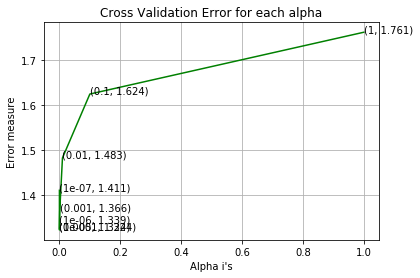

For values of best alpha =  1e-05 The train log loss is: 1.2671833366284841
For values of best alpha =  1e-05 The cross validation log loss is: 1.323922953098182
For values of best alpha =  1e-05 The test log loss is: 1.2964206966283915


In [52]:
# Logistic regression on selected features

train= tfidf_sent_vectors#normalize(np.array(tfidf_sent_vectors), axis=0)
test= tfidf_test_sent_vectors#normalize(np.array(tfidf_test_sent_vectors), axis=0)
cv= tfidf_cv_sent_vectors#normalize(np.array(tfidf_cv_sent_vectors), axis=0)

# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-7, 1)]
cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train, y_train) 
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train, y_train)
    predict_y = sig_clf.predict_proba(cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train, y_train)

predict_y = sig_clf.predict_proba(train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


For values of alpha =  1e-07 The log loss is: 1.2760023336838862
For values of alpha =  1e-06 The log loss is: 1.2149598120378875
For values of alpha =  1e-05 The log loss is: 1.20881224226151
For values of alpha =  0.0001 The log loss is: 1.1827474871621833
For values of alpha =  0.001 The log loss is: 1.27262593379586
For values of alpha =  0.01 The log loss is: 1.4494025765437768
For values of alpha =  0.1 The log loss is: 1.6255736046142173
For values of alpha =  1 The log loss is: 1.7756037139807


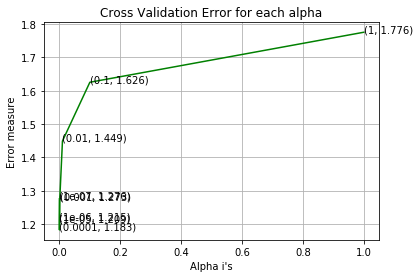

For values of best alpha =  0.0001 The train log loss is: 1.076791373912068
For values of best alpha =  0.0001 The cross validation log loss is: 1.1827474871621833
For values of best alpha =  0.0001 The test log loss is: 1.175407123078218


In [54]:
# stacking w2v with tfidf and checking results:

train= hstack((tfidf_sent_vectors, best_tfidfs_train))#
test= hstack((tfidf_test_sent_vectors, best_tfidfs_test))#normalize(np.array(tfidf_test_sent_vectors), axis=0)
cv= hstack((tfidf_cv_sent_vectors, best_tfidfs_cv))#tfidf_cv_sent_vectors#normalize(np.array(tfidf_cv_sent_vectors), axis=0)

# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-7, 1)]
cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train, y_train) 
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train, y_train)
    predict_y = sig_clf.predict_proba(cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train, y_train)

predict_y = sig_clf.predict_proba(train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


In [55]:
# Trying SVD 
# referenced from https://github.com/chrisjmccormick/LSA_Classification/blob/master/runClassification_LSA.py


import time
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer


svd = TruncatedSVD(100)
lsa = make_pipeline(svd, Normalizer(copy=False))
t0 = time.time()
x_train_lsa = lsa.fit_transform(normalize(best_tfidfs_train, axis= 0))
x_test_lsa = lsa.fit_transform(normalize(best_tfidfs_test, axis= 0))
x_cv_lsa = lsa.fit_transform(normalize(best_tfidfs_cv, axis= 0))

print("  done in %.3fsec" % (time.time() - t0))

explained_variance = svd.explained_variance_ratio_.sum()
print("  Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))


  done in 0.985sec
  Explained variance of the SVD step: 88%


In [0]:
# Trying SVD 
# referenced from https://github.com/chrisjmccormick/LSA_Classification/blob/master/runClassification_LSA.py


import time
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer


svd = TruncatedSVD(100)
lsa = make_pipeline(svd, Normalizer(copy=False))

x_train_lsa = lsa.fit_transform(normalize(best_tfidfs_train, axis= 0))
x_test_lsa = lsa.fit_transform(normalize(best_tfidfs_test, axis= 0))
x_cv_lsa = lsa.fit_transform(normalize(best_tfidfs_cv, axis= 0))
'''
x_train_lsa = lsa.fit_transform(train_text_feature_onehotCoding)#normalize(train_text_feature_onehotCoding, axis= 0))
x_test_lsa = lsa.fit_transform(test_text_feature_onehotCoding)#normalize(test_text_feature_onehotCoding, axis= 0))
x_cv_lsa = lsa.fit_transform(cv_text_feature_onehotCoding)#normalize(cv_text_feature_onehotCoding, axis= 0))
'''
explained_variance = svd.explained_variance_ratio_.sum()
print("  Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))


  Explained variance of the SVD step: 82%


For values of alpha =  1e-05 The log loss is: 1.1164940453627246
For values of alpha =  0.0001 The log loss is: 1.1149897606658274
For values of alpha =  0.001 The log loss is: 1.1704229451132349
For values of alpha =  0.01 The log loss is: 1.3372697449268336
For values of alpha =  0.1 The log loss is: 1.5289823732026342
For values of alpha =  1 The log loss is: 1.7431479840767252


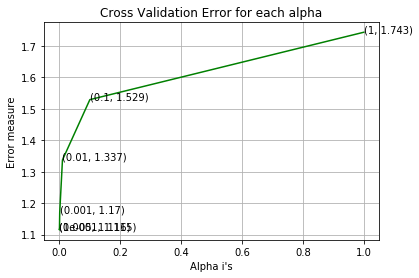

For values of best alpha =  0.0001 The train log loss is: 0.9180122748522613
For values of best alpha =  0.0001 The cross validation log loss is: 1.1149897606658274
For values of best alpha =  0.0001 The test log loss is: 1.0751387818871685


In [57]:


train= hstack((tfidf_sent_vectors, normalize(best_tfidfs_train, axis= 0)))#
test= hstack((tfidf_test_sent_vectors, normalize(best_tfidfs_test, axis= 0)))#normalize(np.array(tfidf_test_sent_vectors), axis=0)
cv= hstack((tfidf_cv_sent_vectors, normalize(best_tfidfs_cv, axis= 0)))#tfidf_cv_sent_vectors#normalize(np.array(tfidf_cv_sent_vectors), axis=0)


train= hstack((train, normalize(x_train_lsa, axis=0)))
test= hstack((test, normalize(x_test_lsa, axis=0)))
cv= hstack((cv, normalize(x_cv_lsa, axis=0)))

# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    #clf= RF(class_weight='balanced', n_jobs= -1, max_depth= i, n_estimators= j)
    clf.fit(train, y_train) 

    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train, y_train)
    predict_y = sig_clf.predict_proba(cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train, y_train)

predict_y = sig_clf.predict_proba(train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


In [0]:
# stacking logistic regression, linear regression and random forest

train= best_tfidfs_train#normalize(best_tfidfs_train, axis= 0)
test= best_tfidfs_test#normalize(best_tfidfs_test, axis= 0)
cv= best_tfidfs_cv#normalize(best_tfidfs_cv, axis= 0)


clf1 = SGDClassifier(alpha=0.00001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train, y_train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=.000001, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train, y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")

clf3 = RF(n_estimators= 400, max_depth= 30, class_weight='balanced', n_jobs= -1)
clf3.fit(train, y_train)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")


sig_clf1.fit(train, y_train)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(y_cv, sig_clf1.predict_proba(cv))))
sig_clf2.fit(train, y_train)
print("Linear Regression : Log Loss: %0.2f" % (log_loss(y_cv, sig_clf2.predict_proba(cv))))
sig_clf3.fit(train, y_train)
print("Linear Regression : Log Loss: %0.2f" % (log_loss(y_cv, sig_clf3.predict_proba(cv))))

print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train, y_train)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(y_cv, sclf.predict_proba(cv))))
    log_error =log_loss(y_cv, sclf.predict_proba(cv))
    if best_alpha > log_error:
        best_alpha = log_error

In [87]:
lr = LogisticRegression(C=1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train, y_train)

log_error = log_loss(y_train, sclf.predict_proba(train))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(y_cv, sclf.predict_proba(cv))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(y_test, sclf.predict_proba(test))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test)- y_test))/y_test.shape[0])


Log loss (train) on the stacking classifier : 0.3705903398420742
Log loss (CV) on the stacking classifier : 0.990539761351731
Log loss (test) on the stacking classifier : 0.9849095546964872
Number of missclassified point : 0.3218045112781955


In [88]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train, y_train)
print("Log loss (train) on the VotingClassifier :", log_loss(y_train, vclf.predict_proba(train)))
print("Log loss (CV) on the VotingClassifier :", log_loss(y_cv, vclf.predict_proba(cv)))
print("Log loss (test) on the VotingClassifier :", log_loss(y_test, vclf.predict_proba(test)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test)- y_test))/y_test.shape[0])
#plot_confusion_matrix(y_test=y_test, predict_y=vclf.predict(test))

Log loss (train) on the VotingClassifier : 0.7558432305617571
Log loss (CV) on the VotingClassifier : 1.0677153606296688
Log loss (test) on the VotingClassifier : 1.053229958783276
Number of missclassified point : 0.3458646616541353


In [0]:
# Finally Log Loss is achieved below 1 stacking logistic regression, linear regression and random forest.
# we can do further feature engineering to reduce further 

<h2>using gene and variation features</h2>

In [95]:
train_df['Gene+Variation']= train_df['Gene']+ ' '+train_df['Variation']  
test_df['Gene+Variation']= test_df['Gene']+ ' '+test_df['Variation']  
cv_df['Gene+Variation']= cv_df['Gene']+ ' '+cv_df['Variation']  
train_df.head(1)

,ID,Gene,Variation,Class,TEXT,Gene+Variation
1590,1590,VHL,R64P,4,The von Hippel-Lindau tumor suppressor protein...,VHL R64P


In [96]:
test_df.head(1)

,ID,Gene,Variation,Class,TEXT,Gene+Variation
1648,1648,FLT3,Y591D,7,"In acute myeloid leukemia (AML), two clusters ...",FLT3 Y591D


In [97]:
cv_df.head(1)

,ID,Gene,Variation,Class,TEXT,Gene+Variation
2485,2485,BRCA1,M1783T,6,ABSTRACT Germline mutations that inactivate th...,BRCA1 M1783T


In [98]:
# tfidf on gene and variation feature

from sklearn.feature_extraction.text import TfidfVectorizer
# modifying BoW into tfidf with max features/words= 1000
text_vectorizer = TfidfVectorizer(ngram_range= (1,5), min_df=3)
train_geneVar_feature_onehotCoding = text_vectorizer.fit_transform(train_df['Gene+Variation'])

test_geneVar_feature_onehotCoding= text_vectorizer.transform(test_df['Gene+Variation'])

cv_geneVar_feature_onehotCoding= text_vectorizer.transform(cv_df['Gene+Variation'])
print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 5124740


In [100]:
print("Max number of features :", np.shape(train_geneVar_feature_onehotCoding)[1])

Max number of features : 157


In [102]:
# logistic regression on Gene+Var feature


train_log_error_array= []
test_log_error_array= []
cv_log_error_array= []

alp = [10 ** x for x in range(-6, -2)]


train= train_geneVar_feature_onehotCoding
test= test_geneVar_feature_onehotCoding
cv= cv_geneVar_feature_onehotCoding

bestfit = (SelectKBest(chi2, k=j).fit(train, y_train))
best_train= bestfit.transform(train)
best_cv = bestfit.transform(cv)
best_test = bestfit.transform(test)

print('*'*100)
print('Using ', np.shape(best_train)[1], ' best features and applying hyper parameter tuning...')
for i in alp:

  clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=0)
  clf.fit(best_train, y_train) 

  sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
  sig_clf.fit(best_train, y_train)
  predict_y_train = sig_clf.predict_proba(best_train)
  predict_y_cv = sig_clf.predict_proba(best_cv)
  predict_y_test = sig_clf.predict_proba(best_test)
  #cv_log_error_array.append([log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15), j, i])
  print('Alpha= ',i, 'with top ',j, "features, Train loss: {:.3f}, CV loss: {:.3f}, Test loss: {:.3f}"\
        .format(log_loss(y_train, predict_y_train, labels=clf.classes_, eps=1e-15),\
                log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15),\
                log_loss(y_test, predict_y_test, labels=clf.classes_, eps=1e-15)))
  train_log_error_array.append(log_loss(y_train, predict_y_train, labels=clf.classes_, eps=1e-15))
  test_log_error_array.append(log_loss(y_test, predict_y_test, labels=clf.classes_, eps=1e-15))
  cv_log_error_array.append(log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15))



****************************************************************************************************
Using  157  best features and applying hyper parameter tuning...
Alpha=  1e-06 with top  157 features, Train loss: 1.221, CV loss: 1.298, Test loss: 1.291
Alpha=  1e-05 with top  157 features, Train loss: 1.010, CV loss: 1.142, Test loss: 1.107
Alpha=  0.0001 with top  157 features, Train loss: 0.986, CV loss: 1.121, Test loss: 1.087
Alpha=  0.001 with top  157 features, Train loss: 1.058, CV loss: 1.156, Test loss: 1.126


In [104]:
#stacking tfidf text with tfidf gene+var
# applying logitic regression
train_log_error_array= []
test_log_error_array= []
cv_log_error_array= []

alp = [10 ** x for x in range(-6, -2)]


train= hstack ((train_geneVar_feature_onehotCoding, best_tfidfs_train)) 
test= hstack ((test_geneVar_feature_onehotCoding, best_tfidfs_test))
cv= hstack ((cv_geneVar_feature_onehotCoding, best_tfidfs_cv))


print('*'*100)
print('Using ', np.shape(train)[1], ' best features and applying hyper parameter tuning...')
for i in alp:

  clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=0)
  clf.fit(train, y_train) 

  sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
  sig_clf.fit(train, y_train)
  predict_y_train = sig_clf.predict_proba(train)
  predict_y_cv = sig_clf.predict_proba(cv)
  predict_y_test = sig_clf.predict_proba(test)
  #cv_log_error_array.append([log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15), j, i])
  print('Alpha= ',i, 'with top ',j, "features, Train loss: {:.3f}, CV loss: {:.3f}, Test loss: {:.3f}"\
        .format(log_loss(y_train, predict_y_train, labels=clf.classes_, eps=1e-15),\
                log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15),\
                log_loss(y_test, predict_y_test, labels=clf.classes_, eps=1e-15)))
  train_log_error_array.append(log_loss(y_train, predict_y_train, labels=clf.classes_, eps=1e-15))
  test_log_error_array.append(log_loss(y_test, predict_y_test, labels=clf.classes_, eps=1e-15))
  cv_log_error_array.append(log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15))



****************************************************************************************************
Using  4157  best features and applying hyper parameter tuning...
Alpha=  1e-06 with top  157 features, Train loss: 0.893, CV loss: 1.104, Test loss: 1.126
Alpha=  1e-05 with top  157 features, Train loss: 0.738, CV loss: 0.975, Test loss: 0.968
Alpha=  0.0001 with top  157 features, Train loss: 0.800, CV loss: 0.990, Test loss: 0.968
Alpha=  0.001 with top  157 features, Train loss: 0.960, CV loss: 1.077, Test loss: 1.048


In [105]:
# Applying linear Regression

train_log_error_array= []
test_log_error_array= []
cv_log_error_array= []

alp = [10 ** x for x in range(-6, -2)]


train= hstack ((train_geneVar_feature_onehotCoding, best_tfidfs_train)) 
test= hstack ((test_geneVar_feature_onehotCoding, best_tfidfs_test))
cv= hstack ((cv_geneVar_feature_onehotCoding, best_tfidfs_cv))


print('*'*100)
print('Using ', np.shape(train)[1], ' best features and applying hyper parameter tuning...')
for i in alp:

  clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=0)
  clf.fit(train, y_train) 

  sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
  sig_clf.fit(train, y_train)
  predict_y_train = sig_clf.predict_proba(train)
  predict_y_cv = sig_clf.predict_proba(cv)
  predict_y_test = sig_clf.predict_proba(test)
  #cv_log_error_array.append([log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15), j, i])
  print('Alpha= ',i, 'with top ',j, "features, Train loss: {:.3f}, CV loss: {:.3f}, Test loss: {:.3f}"\
        .format(log_loss(y_train, predict_y_train, labels=clf.classes_, eps=1e-15),\
                log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15),\
                log_loss(y_test, predict_y_test, labels=clf.classes_, eps=1e-15)))
  train_log_error_array.append(log_loss(y_train, predict_y_train, labels=clf.classes_, eps=1e-15))
  test_log_error_array.append(log_loss(y_test, predict_y_test, labels=clf.classes_, eps=1e-15))
  cv_log_error_array.append(log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15))



****************************************************************************************************
Using  4157  best features and applying hyper parameter tuning...
Alpha=  1e-06 with top  157 features, Train loss: 0.940, CV loss: 1.154, Test loss: 1.130
Alpha=  1e-05 with top  157 features, Train loss: 0.858, CV loss: 1.104, Test loss: 1.098
Alpha=  0.0001 with top  157 features, Train loss: 0.949, CV loss: 1.136, Test loss: 1.150
Alpha=  0.001 with top  157 features, Train loss: 1.237, CV loss: 1.325, Test loss: 1.319


In [107]:
# applying random forest


train_log_error_array= []
test_log_error_array= []
cv_log_error_array= []


depth =  [10, 20, 30, 40, 50]
n_estimators= [100, 200, 400, 500, 600]

train= hstack ((train_geneVar_feature_onehotCoding, best_tfidfs_train)) 
test= hstack ((test_geneVar_feature_onehotCoding, best_tfidfs_test))
cv= hstack ((cv_geneVar_feature_onehotCoding, best_tfidfs_cv))


print('*'*100)
print('Using ', np.shape(train)[1], ' best features and applying hyper parameter tuning...')

for j in n_estimators:
  for i in depth:

    clf = RF(n_estimators= j, max_depth= i, class_weight='balanced', n_jobs= -1)
  
    #clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=0)
    clf.fit(train, y_train) 

    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train, y_train)
    predict_y_train = sig_clf.predict_proba(train)
    predict_y_cv = sig_clf.predict_proba(cv)
    predict_y_test = sig_clf.predict_proba(test)
    #cv_log_error_array.append([log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15), j, i])
    print('Alpha= ',i, 'with top ',j, "features, Train loss: {:.3f}, CV loss: {:.3f}, Test loss: {:.3f}"\
          .format(log_loss(y_train, predict_y_train, labels=clf.classes_, eps=1e-15),\
                  log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15),\
                  log_loss(y_test, predict_y_test, labels=clf.classes_, eps=1e-15)))
    train_log_error_array.append(log_loss(y_train, predict_y_train, labels=clf.classes_, eps=1e-15))
    test_log_error_array.append(log_loss(y_test, predict_y_test, labels=clf.classes_, eps=1e-15))
    cv_log_error_array.append(log_loss(y_cv, predict_y_cv, labels=clf.classes_, eps=1e-15))



****************************************************************************************************
Using  4157  best features and applying hyper parameter tuning...
Alpha=  10 with top  100 features, Train loss: 1.026, CV loss: 1.190, Test loss: 1.147
Alpha=  20 with top  100 features, Train loss: 0.704, CV loss: 1.056, Test loss: 1.018
Alpha=  30 with top  100 features, Train loss: 0.571, CV loss: 1.017, Test loss: 0.992
Alpha=  40 with top  100 features, Train loss: 0.554, CV loss: 1.017, Test loss: 1.003
Alpha=  50 with top  100 features, Train loss: 0.553, CV loss: 1.013, Test loss: 1.000
Alpha=  10 with top  200 features, Train loss: 1.025, CV loss: 1.180, Test loss: 1.148
Alpha=  20 with top  200 features, Train loss: 0.690, CV loss: 1.052, Test loss: 1.008
Alpha=  30 with top  200 features, Train loss: 0.570, CV loss: 1.019, Test loss: 0.991
Alpha=  40 with top  200 features, Train loss: 0.549, CV loss: 1.013, Test loss: 0.992
Alpha=  50 with top  200 features, Train loss: 0.5

In [115]:
j, i= 400,30
best_alpha = np.argmin(cv_log_error_array)
clf = RF(n_estimators= j, max_depth= i, class_weight='balanced', n_jobs= -1)
clf.fit(train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train, y_train)


predict_y = sig_clf.predict_proba(train)
print('Estimators= ', j, 'depth', i, "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv)
print('Estimators= ', j, 'depth', i,  "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test)
print('Estimators= ', j, 'depth', i, "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Estimators=  400 depth 30 The train log loss is: 0.5772269692140279
Estimators=  400 depth 30 The cross validation log loss is: 1.0266432048394352
Estimators=  400 depth 30 The test log loss is: 1.0063413806919683


In [113]:
# stacking logistic regression, linear regression and random forest


clf1 = SGDClassifier(alpha=0.00001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train, y_train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=.00001, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train, y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")

clf3 = RF(n_estimators= 400, max_depth= 30, class_weight='balanced', n_jobs= -1)
clf3.fit(train, y_train)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")


sig_clf1.fit(train, y_train)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(y_cv, sig_clf1.predict_proba(cv))))
sig_clf2.fit(train, y_train)
print("Linear Regression : Log Loss: %0.2f" % (log_loss(y_cv, sig_clf2.predict_proba(cv))))
sig_clf3.fit(train, y_train)
print("Random forest : Log Loss: %0.2f" % (log_loss(y_cv, sig_clf3.predict_proba(cv))))

print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train, y_train)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(y_cv, sclf.predict_proba(cv))))
    log_error =log_loss(y_cv, sclf.predict_proba(cv))
    if best_alpha > log_error:
        best_alpha = log_error
        
        
lr = LogisticRegression(C=1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train, y_train)

log_error = log_loss(y_train, sclf.predict_proba(train))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(y_cv, sclf.predict_proba(cv))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(y_test, sclf.predict_proba(test))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test)- y_test))/y_test.shape[0])


Logistic Regression :  Log Loss: 1.08
Linear Regression : Log Loss: 1.21
Random forest : Log Loss: 1.03
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.177
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 2.030
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.492
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.046
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 0.995
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.073
Log loss (train) on the stacking classifier : 0.37331777180950737
Log loss (CV) on the stacking classifier : 0.9967975217579944
Log loss (test) on the stacking classifier : 0.9900055312226514
Number of missclassified point : 0.33383458646616543


In [114]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train, y_train)
print("Log loss (train) on the VotingClassifier :", log_loss(y_train, vclf.predict_proba(train)))
print("Log loss (CV) on the VotingClassifier :", log_loss(y_cv, vclf.predict_proba(cv)))
print("Log loss (test) on the VotingClassifier :", log_loss(y_test, vclf.predict_proba(test)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test)- y_test))/y_test.shape[0])
#plot_confusion_matrix(y_test=y_test, predict_y=vclf.predict(test))

Log loss (train) on the VotingClassifier : 0.7530927215414489
Log loss (CV) on the VotingClassifier : 1.0714655129330286
Log loss (test) on the VotingClassifier : 1.0517163460398598
Number of missclassified point : 0.35037593984962406


In [1]:
from prettytable import PrettyTable
x= PrettyTable(["Features", "Model","Train loss", "Test loss", "CV loss"])
x.add_row(['TEXT', 'Logistic Regression', "{:.3f}".format(0.8332438143499272) , "{:.3f}".format(1.0653408661663586), "{:.3f}".format(1.0750077009529182)])
x.add_row(['Gene+Variation, TEXT', 'Logistic Regression', "{:.3f}".format(0.800) , "{:.3f}".format(0.968), "{:.3f}".format(0.990)])

x.add_row(['TEXT', 'Linear Regression', "{:.3f}".format( 0.9663748231775053) , "{:.3f}".format(1.1985157941743294), "{:.3f}".format(1.2091975105286878)])
x.add_row(['Gene+Variation, TEXT', 'Linear Regression', "{:.3f}".format(0.858) , "{:.3f}".format(1.098), "{:.3f}".format(1.104)])

x.add_row(['TEXT', 'Random Forest', "{:.3f}".format(0.567708384453304) , "{:.3f}".format(0.99037253640177), "{:.3f}".format(1.0111861842440804)])
x.add_row(['Gene+Variation, TEXT', 'Random Forest', "{:.3f}".format(0.565) , "{:.3f}".format(0.987), "{:.3f}".format(1.012)])

x.add_row(['TEXT', 'Stack(LogReg+LinReg+RF)', "{:.3f}".format(0.3705903398420742) , "{:.3f}".format(0.9849095546964872), "{:.3f}".format(0.990539761351731)])
x.add_row(['Gene+Variation, TEXT', 'Stack(LogReg+LinReg+RF)', "{:.3f}".format(0.37331777180950737) , "{:.3f}".format(0.9900055312226514), "{:.3f}".format(0.9967975217579944)])

x.add_row(['TEXT', 'Max Vote', "{:.3f}".format(0.7558432305617571) , "{:.3f}".format(1.053229958783276), "{:.3f}".format(1.0677153606296688)])
x.add_row(['Gene+Variation, TEXT', 'Max Vote', "{:.3f}".format(0.7530927215414489) , "{:.3f}".format(1.0517163460398598), "{:.3f}".format(1.0714655129330286)])


print(x)



+----------------------+-------------------------+------------+-----------+---------+
|       Features       |          Model          | Train loss | Test loss | CV loss |
+----------------------+-------------------------+------------+-----------+---------+
|         TEXT         |   Logistic Regression   |   0.833    |   1.065   |  1.075  |
| Gene+Variation, TEXT |   Logistic Regression   |   0.800    |   0.968   |  0.990  |
|         TEXT         |    Linear Regression    |   0.966    |   1.199   |  1.209  |
| Gene+Variation, TEXT |    Linear Regression    |   0.858    |   1.098   |  1.104  |
|         TEXT         |      Random Forest      |   0.568    |   0.990   |  1.011  |
| Gene+Variation, TEXT |      Random Forest      |   0.565    |   0.987   |  1.012  |
|         TEXT         | Stack(LogReg+LinReg+RF) |   0.371    |   0.985   |  0.991  |
| Gene+Variation, TEXT | Stack(LogReg+LinReg+RF) |   0.373    |   0.990   |  0.997  |
|         TEXT         |         Max Vote        |   0